In [ ]:
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.engine.sequential import Sequential

In [ ]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_img = train_img.astype("float")/255.
train_img = np.expand_dims(train_img,axis=-1)

test_img = test_img.astype("float")/255.
test_img = np.expand_dims(test_img,axis=-1)

In [ ]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

history = model.fit(train_img,train_label,epochs=10,validation_split=0.2,batch_size=128)

Epoch 1/10
375/375 [==============================] - 555s 1s/step - loss: 0.5048 - accuracy: 0.8315 - val_loss: 0.0771 - val_accuracy: 0.9799
Epoch 2/10
375/375 [==============================] - 592s 2s/step - loss: 0.0805 - accuracy: 0.9797 - val_loss: 0.0591 - val_accuracy: 0.9865
Epoch 3/10
375/375 [==============================] - 509s 1s/step - loss: 0.0606 - accuracy: 0.9851 - val_loss: 0.0419 - val_accuracy: 0.9894
Epoch 4/10
375/375 [==============================] - 535s 1s/step - loss: 0.0464 - accuracy: 0.9892 - val_loss: 0.0411 - val_accuracy: 0.9896
Epoch 5/10
375/375 [==============================] - 518s 1s/step - loss: 0.0342 - accuracy: 0.9918 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 6/10
375/375 [==============================] - 531s 1s/step - loss: 0.0419 - accuracy: 0.9903 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 7/10
375/375 [==============================] - 517s 1s/step - loss: 0.0329 - accuracy: 0.9921 - val_loss: 0.0840 - val_accuracy: 0.9828

In [ ]:
loss,accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 22s 69ms/step - loss: 0.0425 - accuracy: 0.9918


In [ ]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

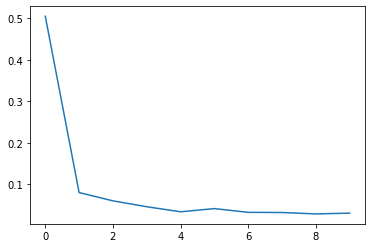

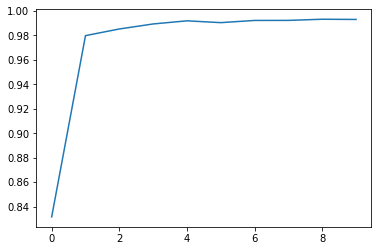

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss)),loss)
plt.show()

plt.plot(range(len(accuracy)),accuracy)
plt.show()